# What Affects Borrower's APR
## by Yousef Barnawi

## Investigation Overview

> In this project, I did an extensive invistigation on loan data to determine what are the properties or features the borrower should achive before applying for a loan

## Dataset Overview

> The datast I worked on has an extensive breakdown for obtained loans. It has everything, from loan amount and APR to whether the borrower has a home or not.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")



In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df = df[~df['ListingNumber'].duplicated()]
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])
df = df.rename(columns={"ProsperRating (numeric)": "ProsperRating_numeric",
                        "ProsperRating (Alpha)": "ProsperRating_alpha",'ListingCategory (numeric)':'ListingCategory'})
df = df[df['ProsperRating_alpha'].notnull() & df['Occupation'].notnull() & df['EmploymentStatusDuration'].notnull()]
df = df[['ListingNumber',
'ListingCreationDate',
'Term',
'BorrowerAPR',
'ProsperRating_alpha',
'ProsperScore',
'ListingCategory',
'Occupation',
'EmploymentStatus',
'EmploymentStatusDuration',
'IsBorrowerHomeowner',
'CreditScoreRangeUpper',
'CurrentCreditLines',
'OpenCreditLines',
'IncomeRange',
'StatedMonthlyIncome',
'LoanOriginalAmount']]
prosper_classes = ['HR', 'E', 'D', 'C', 'B','A','AA']
PRatings = pd.api.types.CategoricalDtype(ordered=True, categories = prosper_classes)
df['ProsperRating_alpha'] = df['ProsperRating_alpha'].astype(PRatings);

income_classes = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999','$100,000+']
incomeCategories = pd.api.types.CategoricalDtype(ordered=True, categories = income_classes)
df['IncomeRange'] = df['IncomeRange'].astype(incomeCategories);

df['CreditScoreRangeUpper'] = df['CreditScoreRangeUpper'].astype(str).str[:-2]
creditScore_classes = ['619', '639', '659', '679', '699','719','739','759','779','799','819','839','859','879','899']
creditCategories = pd.api.types.CategoricalDtype(ordered=True, categories = creditScore_classes)
df['CreditScoreRangeUpper'] = df['CreditScoreRangeUpper'].astype(creditCategories);

df['ListingCategory'] = df['ListingCategory'].astype(str)      
df['ListingNumber'] = df['ListingNumber'].astype(str)

df['ProsperScore'] = df['ProsperScore'].astype(str).str[:-2]
prosperScore_classes = ['1', '2', '3', '4', '5','6','7','8','9','10','11']
prosperCategories = pd.api.types.CategoricalDtype(ordered=True, categories = prosperScore_classes)
df['ProsperScore'] = df['ProsperScore'].astype(prosperCategories);

df['Term'] = df['Term'].astype(str)
term_classes = ['12', '36', '60']
termCategories = pd.api.types.CategoricalDtype(ordered=True, categories = term_classes)
df['Term'] = df['Term'].astype(termCategories);

dictCategory = {'0': 'Not Available',
        '1': 'Debt Consolidation',
        '2': 'Home Improvement',
        '3': 'Business',
         '4': 'Personal Loan',
         '5':'Student Use',
         '6':'Auto',
         '7':'Other',
         '8':'Baby&Adoption',
         '9':'Boat',
         '10':'Cosmetic Procedure',
         '11':'Engagement Ring',
         '12':'Green Loans',
         '13':'Household Expenses',
         '14':'Large Purchases',
         '15':'Medical/Dental',
         '16':'Motorcycle',
         '17':'RV',
         '18':'Taxes',
         '19':'Vacation',
         '20':'Wedding Loans',
        }
def change_category(df):
    if df['ListingCategory'] in dictCategory.keys():
        strCategory = dictCategory[df['ListingCategory']]
        return strCategory
    else:
        return df['ListingCategory']
    
df['ListingCategory'] = df.apply(change_category, axis=1)
occupation_15 = df.query('Occupation != "Other"')['Occupation'].value_counts().head(15).index
df_top15_occupation = df[df['Occupation'].isin(occupation_15)]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Visualization 1: APR Distribution

> After gathering the data, it was time to plot the distribution of APR. Before polishing the graph, I obtained the one on the right which somewhat resembles a normal distribution. I had to use smaller bins (Left) to look for any patterns and I found that the value 0.35797 repeats a lot, after some invistigation it looks to be an amount that is given to a lot of lower ranked borrowers in the Prosper Rating.

Text(0.5, 1.0, 'APR Distribution')

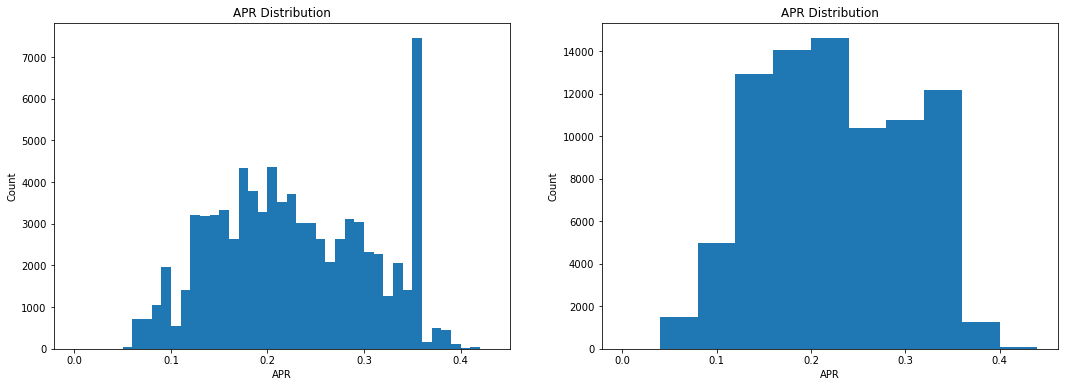

In [3]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
bins = np.arange(0, df['BorrowerAPR'].max()+0.01, 0.01)
plt.hist(data = df, x = 'BorrowerAPR', bins=bins)
plt.ylabel("Count")
plt.xlabel("APR")
plt.title('APR Distribution')

# PLOT ON right
plt.subplot(1, 2, 2)
bins = np.arange(0, df['BorrowerAPR'].max()+0.04, 0.04)
plt.hist(data = df, x = 'BorrowerAPR', bins=bins)
plt.ylabel("Count")
plt.xlabel("APR")
plt.title('APR Distribution')




## Visualization 2: Numeric's Heatmap

> Looking to see how our variables interact with each other I decided to make a heat map that shows our numeric values against APR. Expectedly, it appears that the higher person's monthly income the more likely he will get a lower APR. The same thing somewhat fgoes to the Current and Open credit lines. At about 10, the borrower would have a better APR.

In [4]:
df = df.drop([53167])

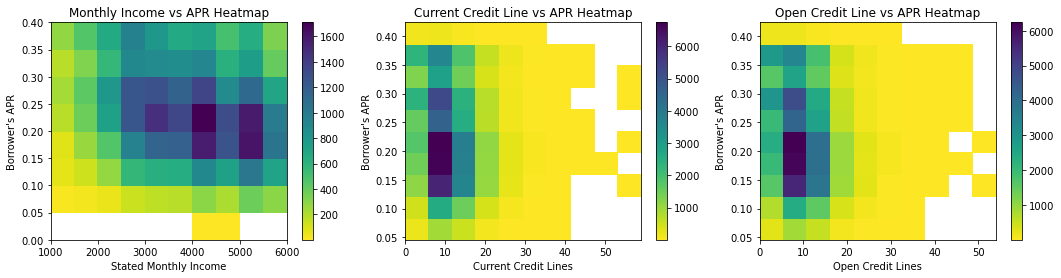

In [12]:
plt.figure(figsize = [18, 4])
plt.subplot(1, 3, 1)
bins_x = np.arange(0, 7000 + 500, 500)
bins_y = np.arange(0, 0.4 + 0.05, 0.05)
plt.hist2d(data = df, x = 'StatedMonthlyIncome', y = 'BorrowerAPR', cmin=0.5, cmap='viridis_r',bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Stated Monthly Income')
plt.ylabel("Borrower's APR");
plt.title("Monthly Income vs APR Heatmap")
plt.xlim(1000,6000)

plt.subplot(1, 3, 2)
bins_x = np.arange(0, 60 + 5, 5)
bins_y = np.arange(0, 0.4 + 0.05, 0.05)
plt.hist2d(data = df, x = 'CurrentCreditLines', y = 'BorrowerAPR', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Current Credit Lines')
plt.title("Current Credit Line vs APR Heatmap")
plt.ylabel("Borrower's APR");


plt.subplot(1, 3, 3)
bins_x = np.arange(0, 60 + 5, 5)
bins_y = np.arange(0, 0.4 + 0.05, 0.05)
plt.hist2d(data = df, x = 'OpenCreditLines', y = 'BorrowerAPR', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.title("Open Credit Line vs APR Heatmap")
plt.xlabel ('Open Credit Lines')
plt.ylabel("Borrower's APR");

## Visualization 3: Categorical heatmap

> To better understand our main inerest data I decided to do a categorical vs categorical heat map. It shows the income range for our most common 15 occupation. Execs, Computer Programmers appear to be the ones with the higher income range.

Text(0.5, 15.0, 'Income Range')

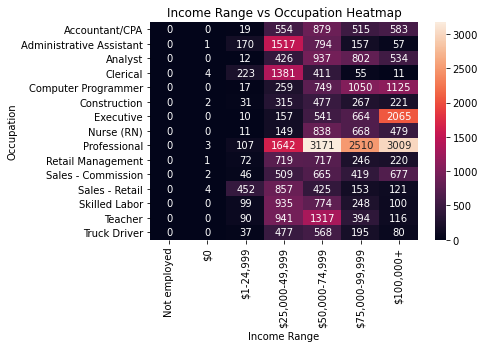

In [11]:
ct_counts = df_top15_occupation.groupby(['Occupation', 'IncomeRange']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'Occupation', columns = 'IncomeRange', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd')
plt.title('Income Range vs Occupation Heatmap')
plt.xlabel('Income Range')

## Visualization 4: APR vs Income Range vs Home

> With Multivariate graphs we can better understand our main features. Finally let's see how one's APR compare in case of getting the same income but what differs is not having Home. Well, it appears that having home is associated with better APR.

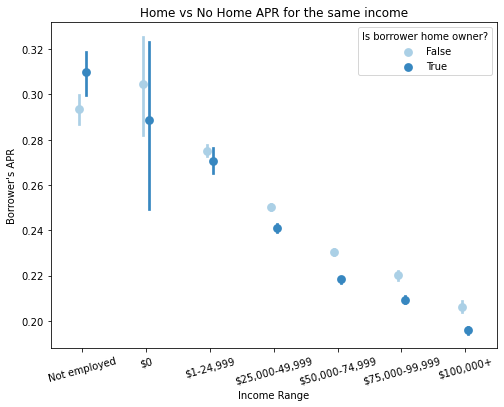

In [8]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x = 'IncomeRange', y = 'BorrowerAPR', hue = 'IsBorrowerHomeowner', dodge = 0.1, linestyles = "", palette = 'Blues')
plt.xticks(rotation=15);
plt.title('Home vs No Home APR for the same income')
plt.xlabel("Income Range")
plt.ylabel("Borrower's APR")
plt.legend(title = 'Is borrower home owner?')

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!